In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import f_oneway, pearsonr

In [40]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
df = pd.read_csv('../imports-85.data', names=headers)
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [41]:

df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
drive_wheels_counts = df['drive-wheels'].value_counts()
drive_wheels_counts.index.name='drive-wheels'
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

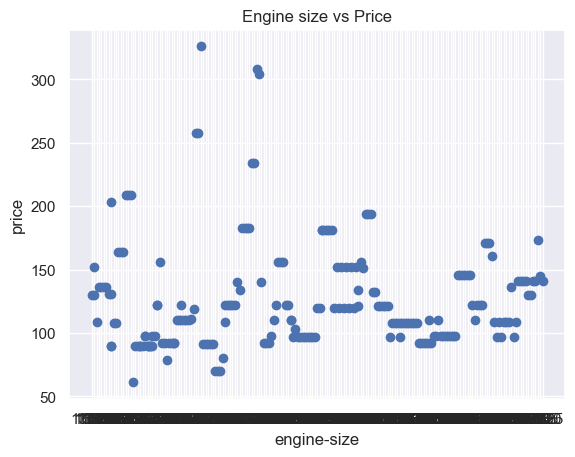

In [12]:
y=df['engine-size']
x=df['price']
plt.scatter(x,y)

plt.title('Engine size vs Price')
plt.xlabel('engine-size')
plt.ylabel('price')

plt.show()

In [26]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
df_grp

C:\Users\roroa\AppData\Local\Temp\ipykernel_8108\1482384951.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean()


,drive-wheels,body-style
0,4wd,hatchback
1,4wd,sedan
2,4wd,wagon
3,fwd,convertible
4,fwd,hardtop
5,fwd,hatchback
6,fwd,sedan
7,fwd,wagon
8,rwd,convertible
9,rwd,hardtop


In [21]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style')


In [24]:
# plt.pcolor(df_pivot, cmap='RdBu')
# plt.colorbar()
# plt.show()

In [31]:
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])
anova_results_l = f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
anova_results_l

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

In [33]:
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])
anova_results_l = f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])
anova_results_l

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In [43]:
# sns.regplot(x='engine-size', y='price', data=df)
# plt.ylim(0,)

C:\Users\roroa\AppData\Local\Temp\ipykernel_8108\238889540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

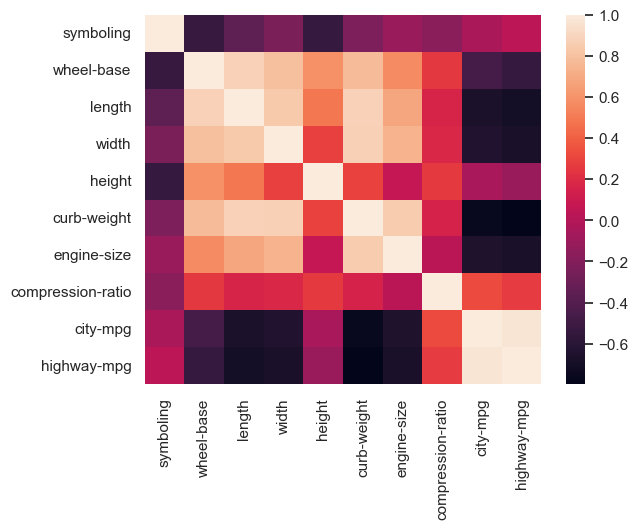

In [51]:
# pearson_coef, p_value = pearsonr(df['horsepower'].astype('int'), df['price'].astype('int'))
sns.heatmap(df.corr())